<font size="6">Udacity Deep Reinforcement Learning Nanodegree Program</font>

<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893"><img src = "Navigation_notebook_resources/Picture/UdacityDRL01.png" width = 950, align = "center"></a>
</div>

Navigation project (banana) of the [Udacity Deep Reinforcement Learning Nanodegree Program](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) from [Christian Motschenbacher](https://gh.linkedin.com/in/christian-motschenbacher-7a660b123)

# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Author, Project and Environment description </a></li>
<li><a href="#ref2">Libraries </a></li>
<li><a href="#ref3">Start the Environment </a></li>
<li><a href="#ref4">Watching/testing an untrained agent </a></li>
<li><a href="#ref5">Training the Agent with DGN </a></li>
<li><a href="#ref6">Plotting the training reward scores </a></li>
<li><a href="#ref7">Watching/testing an trained agent </a></li>
<li><a href="#ref8">Close Environment </a></li>
</div>

<hr>

# Author, Project and Environment description
## Author  
  
**Name: [Christian Motschenbacher](https://gh.linkedin.com/in/christian-motschenbacher-7a660b123)**  
  
**Date: 01/2019**  
  
**Project: Udacity Deep Reinforcement Learning Nanodegree Program: Project 1 Navigation (Banana)**  
**This file contains the training and testing code for this project.**


## Project and Environment description

    
<p>The task of this project was to to train an agent, who navigates in a large environment, collect as many yellow bananas while avoiding blue bananas. The following video is showing how a trained agent is performing this task well.</p>

![](./Navigation_notebook_resources/Picture/UdacityDRL02.gif)

<p>A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana.  Thus, the goal of the agent is to collect as many yellow bananas as possible while avoiding blue bananas.  </p>

<p>The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around the agent's forward direction.  Given this information, the agent has to learn how to best select actions. Four discrete actions are available, corresponding to:</p>

<ul>
<li><strong><code>0</code></strong> - move forward.</li>
<li><strong><code>1</code></strong> - move backward.</li>
<li><strong><code>2</code></strong> - turn left.</li>
<li><strong><code>3</code></strong> - turn right.</li>
</ul>

<p>The task is episodic and in order to solve the environment, the agent must achieve an average score of +13 over 100 consecutive episodes.</p>

<p> For the soution of this task it has been used the banana environment from Unity-Technologies, the Python programming language as well the libraries NumPy, PyTorch and others.</p>


<hr>

# Libraries
Importing the necessary libraries for this project.

In [1]:
from unityagents import UnityEnvironment

import numpy as np
from time import sleep
from pandas import Series

import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML

<hr>

# Start the Environment
  
The next code section opens and starts the Unity Environment. In addition, the environment return its properties such as the amount of possible actions, the state spaces and others.

In [2]:
# The project has been developed in Windows and therefore, the Unity-Technology environment has been used.
# The training can be performed with and without graphics by setting the parameter "no_graphics=False" 
# respectiveley "no_graphics=True".
env = UnityEnvironment(file_name="./Navigation_notebook_resources/Environment/Banana_Windows_x86_64/Banana.exe", 
                       no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


The Environment contains the **_brains_**, which are responsible for deciding the actions of their associated agents. Here we assign the brain and set it as the default brain. This brain will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print(brain_name) # print brain name
print(brain)      # print the properties of the brain

BananaBrain
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


<hr>

# Examine the State and Action Spaces

The simulation contains a single agent that navigates in a large environment. At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction. A reward of `+1` is provided for collecting a yellow banana and a reward of `-1` is provided for collecting a blue banana. 
  
The code cell below print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


<hr>

# Create an intelligent Agent for the following testing, training and testing code section.

In [5]:
from dqn_agent import Agent                         # import the necessary library with the class agent
agent = Agent(state_size=37, action_size=4, seed=0) # create and instance with initial parameters of the agent

<hr>

# Watch/testing an untrained agent

**Example Video of untrained agent.**  
After the following code cell is executed the vido can be started via the play button.

In [6]:
HTML("""
<div align="middle">
<video width="80%" height="" controls>
  <source src="Navigation_notebook_resources/Picture/01_p1_b_untrained.mp4" type="video/mp4">
</video></div>
""")

Once the following testing of an untrained agent code cell is executed, a window will pop up you will watch the agent's untrained performance controlled by the actions from the current untrained Q-table at each time step. 

In [7]:
# testing of an untrained agent code cell
for j in range(1):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    scores = []                                        # list containing scores from each episode
    score = 0                                          # initialize the score
    while True:
        #sleep(0.1)                                     # for debugging and video recording
        action = agent.act(state).astype(int)          # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        scores.append(score)                           # collect scores
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    print("Score: {}".format(score))                   # print the scores

Score: 0.0


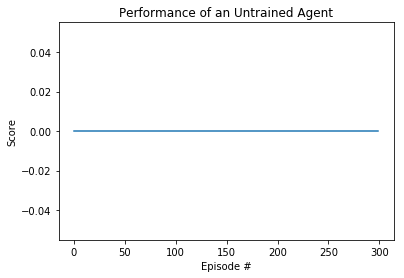

In [8]:
# plot and print the achived scores during this episode
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Performance of an Untrained Agent')
plt.show()

<hr>

# Train the Agent/Model with DQN

**Example Video of an agent while training.**  
After the following code cell is executed the vido can be started via the play button.

In [9]:
HTML("""
<div align="middle">
<video width="80%" height="" controls>
  <source src="Navigation_notebook_resources/Picture/02_p1_b_training.mp4" type="video/mp4">
</video></div>
""")

The training code cell below train the agent from scratch and output the agent's performance continuously. The used parameters have been found by systematically empirical analysis. Once the agent exceeds the score +13, which is defined that the environment and task is solved the program save the model weights of the trained agent in the folder ```"./Navigation_notebook_resources/Model_weights/checkpoint_solved.pth"``` and returns the score for the subsequent plot.

In [10]:
# training code cell
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                          # list containing scores from each episode
    scores_window = deque(maxlen=100)    # last 100 scores
    eps = eps_start                      # initialize epsilon
    i_episode_solved = 0                 # episodes solved environment
    scores_window_solved = scores_window # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment and set in training mode
        state = env_info.vector_observations[0]            # get the next state
        score = 0
        for t in range(max_t):
            #sleep(0.1)                                     # for debugging and video recording
            action = agent.act(state, eps).astype(int)     # get action from agent
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done) # update the parameters in the memory
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score for the window function
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and i_episode_solved == 0:
            i_episode_solved     = i_episode
            scores_window_solved = np.mean(scores_window)
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode_solved-100, scores_window_solved))
            torch.save(agent.qnetwork_local.state_dict(), './Navigation_notebook_resources/Model_weights/checkpoint_solved.pth')
            #break
    
    print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode_solved-100, scores_window_solved))
    torch.save(agent.qnetwork_local.state_dict(), './Navigation_notebook_resources/Model_weights/checkpoint_training_finished.pth')

    return scores

scores = dqn()

Episode 100	Average Score: 0.42
Episode 200	Average Score: 2.93
Episode 300	Average Score: 6.84
Episode 400	Average Score: 11.26
Episode 470	Average Score: 13.14
Environment solved in 370 episodes!	Average Score: 13.14
Episode 500	Average Score: 13.81
Episode 600	Average Score: 14.57
Episode 700	Average Score: 14.70
Episode 800	Average Score: 15.48
Episode 900	Average Score: 15.47
Episode 1000	Average Score: 16.51
Episode 1100	Average Score: 15.91
Episode 1200	Average Score: 15.03
Episode 1300	Average Score: 15.91
Episode 1400	Average Score: 14.50
Episode 1500	Average Score: 15.32
Episode 1600	Average Score: 14.62
Episode 1700	Average Score: 14.62
Episode 1800	Average Score: 14.88
Episode 1900	Average Score: 14.70
Episode 2000	Average Score: 15.65

Environment solved in 370 episodes!	Average Score: 13.14


<hr>

# Plotting the training reward scores
The following code cell plot the score of the trained agent in blue, as well the average score in red and the target score in green.

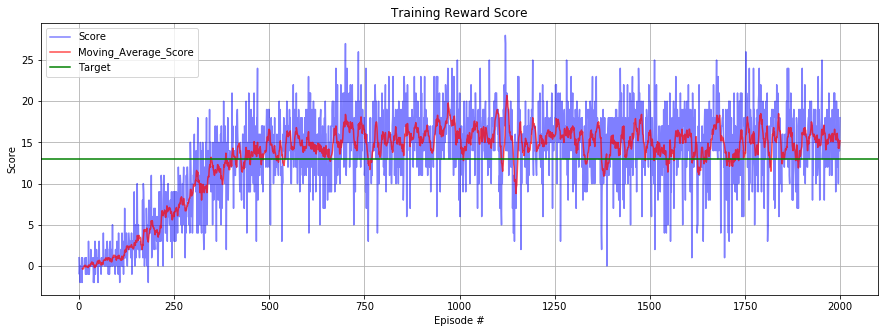

In [11]:
# calculate an average over 10 episodes to see the trend of the training
moving_average_score = Series.rolling(Series(scores), window=10).mean()

# prepare the plot and plot the score of the trained agent in blue, 
# as well the average score in red and the target score in green.
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
# plot the score of the trained agent in blue
plt.plot(np.arange(len(scores)), scores, color='b', alpha=0.5, label='Score')
# plot the average score of the trained agent in red
plt.plot(np.arange(len(scores)), moving_average_score, color='r', alpha=0.7, label='Moving_Average_Score')
# plot the target score in green
ax.axhline(y=13, xmin=0.0, xmax=1.0, color='g', label="Target")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Training Reward Score')
plt.grid(True)
plt.legend(loc=0)
plt.show()

<hr>

# Watch an trained agent  
  

**Example Video of trained agent.**  
After the following code cell is executed the vido can be started via the play button.

In [12]:
HTML("""
<div align="middle">
<video width="80%" height="" controls>
  <source src="Navigation_notebook_resources/Picture/03_p1_b_trained.mp4" type="video/mp4">
</video></div>
""")

The following testing a trained agent code cell test the trained agent in the environment.
The code loads the trained model weights from the folder ```"./Navigation_notebook_resources/Model_weights/checkpoint_solved.pth"``` into the agent model and the agent collect the yellow bananas while avoiding the blue bananas. Once one episode has been finished the cell print the score of the episode and plot the associated reward score diagram.

Score: 8.0


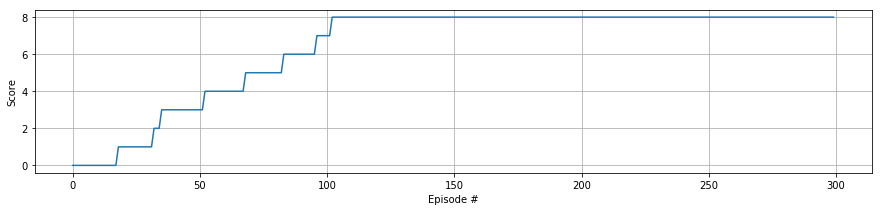

Score: 15.0


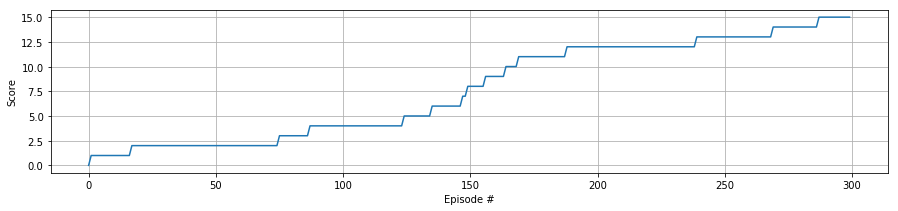

Score: 23.0


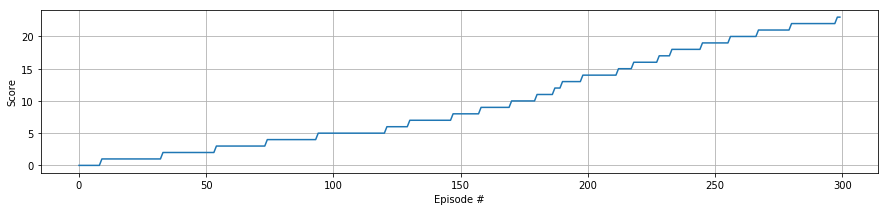

In [13]:
# testing a trained agent code cell
# load the model weights from file
agent.qnetwork_local.load_state_dict(torch.load('./Navigation_notebook_resources/Model_weights/checkpoint_solved.pth'))

for j in range(3):                                     # specify the number of episodes
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    scores = []                                        # list containing scores from each episode
    score = 0                                          # initialize the score
    while True:
        #sleep(0.1)                                     # optional to reduce the speed of the agent
        action = agent.act(state, eps=0.0).astype(int) # get action from agent
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        scores.append(score)                           # collect the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    print("Score: {}".format(score))

    # plot the achieved scores of the testing
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.grid(True)
    plt.show()

<hr>

# Close environment
Close the environment after the training and testing phase.

In [14]:
env.close()

<hr>